In [1]:
import pandas as pd

import os

base_dir = os.getcwd()

In [2]:
# Path for datasets
full_path = base_dir + "\datasets" + "\\"

# Read files
df1 = pd.read_excel(full_path + "Aracaju.xlsx")
df2 = pd.read_excel(full_path + "Fortaleza.xlsx")
df3 = pd.read_excel(full_path + "Natal.xlsx")
df4 = pd.read_excel(full_path + "Recife.xlsx")
df5 = pd.read_excel(full_path + "Salvador.xlsx")

In [3]:
# Concatenate dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
# Display first 5 rows
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
# Display last 5 rows
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
# Display 5 samples
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
94,Recife,2019-01-01,24.70,982,3
150,Natal,2019-01-02,11.13,1035,2
128,Recife,2019-03-02,38.70,982,4
188,Natal,2019-01-02,178.11,1035,3
45,Recife,2019-01-01,15.90,983,8


In [7]:
# Display types of columns
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
# Change type
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
# Select rows with missing values
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
# Substitute null values for mean value
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [11]:
# Select rows with missing values
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
# Substitute null values for mean value
df["Vendas"].fillna(0, inplace=True)

In [13]:
# Remove rows with missing value
df.dropna(inplace=True)

In [14]:
# Remove rows with missing value base on one column
df.dropna(subset=["Vendas"], inplace=True)

In [15]:
# Remove rows with missing value base in all columns
df.dropna(how="all", inplace=True)

In [16]:
# Create new columns
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [17]:
# Create new columns
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [18]:
# Max
df["Receita"].max()

3544.0

In [19]:
# Min
df["Receita"].min()

3.34

In [20]:
# nlargest - top 3 with biggest "Receita"
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [21]:
# nsmallest - top 3 with smalles "Receita"
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [22]:
# Groupby "cidade"
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [23]:
# Order dataset
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [26]:
# Transform column date to int
df["Data"] = df["Data"].view("int64")
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [27]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,1514764800000000000,142.00,1520,1,142.00,1.0
1,Aracaju,1514764800000000000,14.21,1522,6,85.26,6.0
2,Aracaju,1514764800000000000,71.55,1520,1,71.55,1.0
3,Aracaju,1514764800000000000,3.01,1521,7,21.07,7.0
4,Aracaju,1514764800000000000,24.51,1522,8,196.08,8.0


In [29]:
# Transform column to date again
df["Data"] = pd.to_datetime(df["Data"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [30]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [31]:
# Groupby year
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [33]:
# Create new column with year
df["Ano_Venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
184,Natal,2019-01-02,167.16,1037,1,167.16,1.0,2019
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018
20,Aracaju,2018-01-01,39.86,1522,9,358.74,9.0,2018
115,Natal,2019-01-02,202.33,1035,2,404.66,2.0,2019
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2.0,2019


In [34]:
# Extract month and day
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
77,Recife,2019-01-01,102.82,981,6,616.92,6.0,2019,1,1
16,Aracaju,2018-01-01,37.68,1522,10,376.80,10.0,2018,1,1
93,Salvador,2019-01-01,15.58,1037,1,15.58,1.0,2019,1,1
163,Salvador,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2
222,Natal,2019-01-02,43.96,1037,1,43.96,1.0,2019,1,2


In [35]:
# Return oldest date
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [37]:
# Compute days interval
df["diferenca_dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
36,Natal,2019-02-09,328.00,853,2,656.00,2.0,2019,2,9,404 days
14,Recife,2019-01-12,102.91,982,3,308.73,3.0,2019,1,12,376 days
112,Recife,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days
31,Salvador,2019-01-01,202.25,1035,2,404.50,2.0,2019,1,1,365 days
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,6.0,2019,1,1,365 days


In [40]:
# Create column for quarter
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
38,Fortaleza,2019-01-01,35.09,1004,4,140.36,4.0,2019,1,1,365 days,1,1
176,Salvador,2019-01-02,19.42,1035,3,58.26,3.0,2019,1,2,366 days,1,1
115,Fortaleza,2019-03-02,12.23,981,3,36.69,3.0,2019,3,2,425 days,1,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days,1,1
168,Salvador,2019-01-02,20.22,1036,1,20.22,1.0,2019,1,2,366 days,1,1


In [42]:
# Filter vendas from March 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month ==3)]
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda,trimestre_venda
15,Salvador,2019-01-01,20.15,1036,3,60.45,3.0,2019,1,1,365 days,1,1
86,Aracaju,2018-01-01,154.92,1521,5,774.60,5.0,2018,1,1,0 days,1,1
49,Aracaju,2018-01-01,53.74,1522,3,161.22,3.0,2018,1,1,0 days,1,1
75,Salvador,2019-01-01,155.52,1034,1,155.52,1.0,2019,1,1,365 days,1,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1,1


Data view

In [44]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

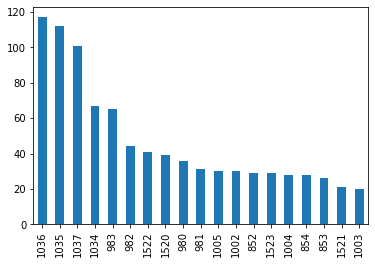

In [50]:
# Plot graphic bar
df["LojaID"].value_counts(ascending=False).plot.bar();

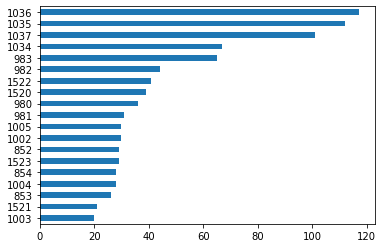

In [51]:
# Plot graphic horizontal bar
df["LojaID"].value_counts(ascending=True).plot.barh();

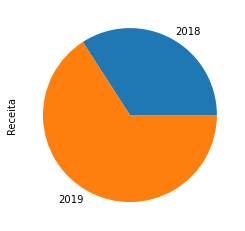

In [52]:
# Pie chart
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [53]:
# Sales by city
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [55]:
import matplotlib.pyplot as plt

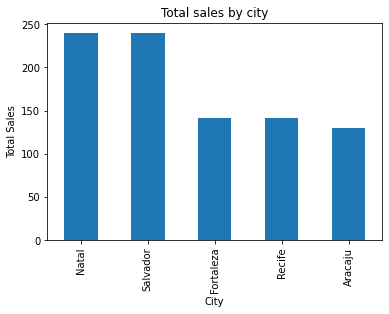

In [56]:
# Adding a title and change the axis names
df["Cidade"].value_counts().plot.bar(title="Total sales by city")
plt.xlabel("City")
plt.ylabel("Total Sales");

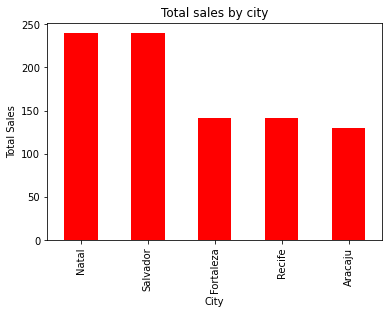

In [57]:
# Change color
df["Cidade"].value_counts().plot.bar(title="Total sales by city", color="red")
plt.xlabel("City")
plt.ylabel("Total Sales");

In [58]:
# Change style
plt.style.use("ggplot")

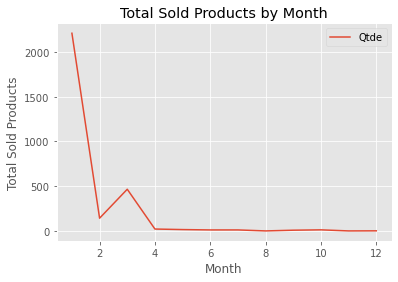

In [60]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Sold Products by Month")
plt.xlabel("Month")
plt.ylabel("Total Sold Products")
plt.legend();

In [61]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [62]:
df_2019 = df[df["Ano_Venda"] == 2019]

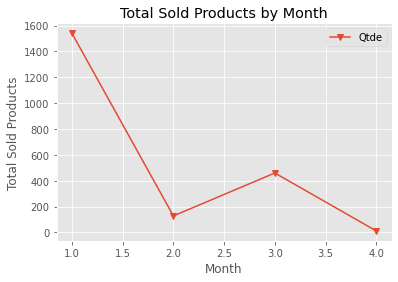

In [63]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v", title="Total Sold Products by Month")
plt.xlabel("Month")
plt.ylabel("Total Sold Products")
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

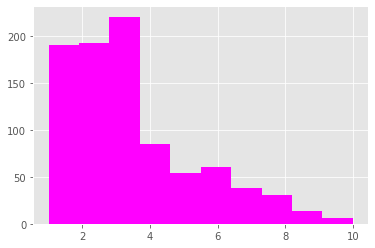

In [64]:
# Histogram
plt.hist(df["Qtde"], color="magenta");

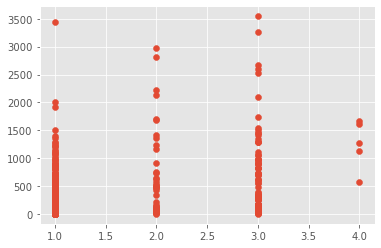

In [65]:
plt.scatter(x=df_2019["mes_venda"], y=df_2019["Receita"]);

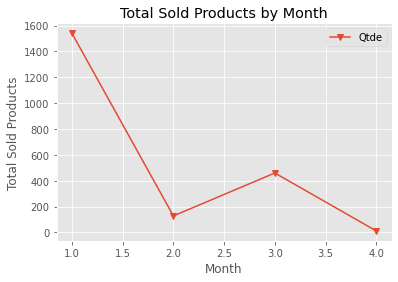

In [66]:
# Save as png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Total Sold Products by Month")
plt.xlabel("Month")
plt.ylabel("Total Sold Products")
plt.legend()
plt.savefig("Graph QTY x Month.png")